In [1]:
pip install pandas textblob nltk

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 626.3/626.3 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import pandas as pd

# Load data
data = pd.read_csv('sentimentdataset.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [6]:
from textblob import TextBlob

# Define a function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis
data['sentiment'] = data['text'].apply(analyze_sentiment)
data.head()

,Unnamed: 0.1,Unnamed: 0,text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,sentiment
0,0,0,Enjoying a beautiful day at the park! ...,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,0.750000
1,1,1,Traffic was terrible this morning. ...,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,-1.000000
2,2,2,Just finished an amazing workout! 💪 ...,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,0.750000
3,3,3,Excited about the upcoming weekend getaway! ...,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,0.468750
4,4,4,Trying out a new recipe for dinner tonight. ...,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,0.136364


In [7]:
data.to_csv('sentiment_analysis_results.csv', index=False)
print("Sentiment analysis completed and results saved to 'sentiment_analysis_results.csv'")

Sentiment analysis completed and results saved to 'sentiment_analysis_results.csv'


In [8]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



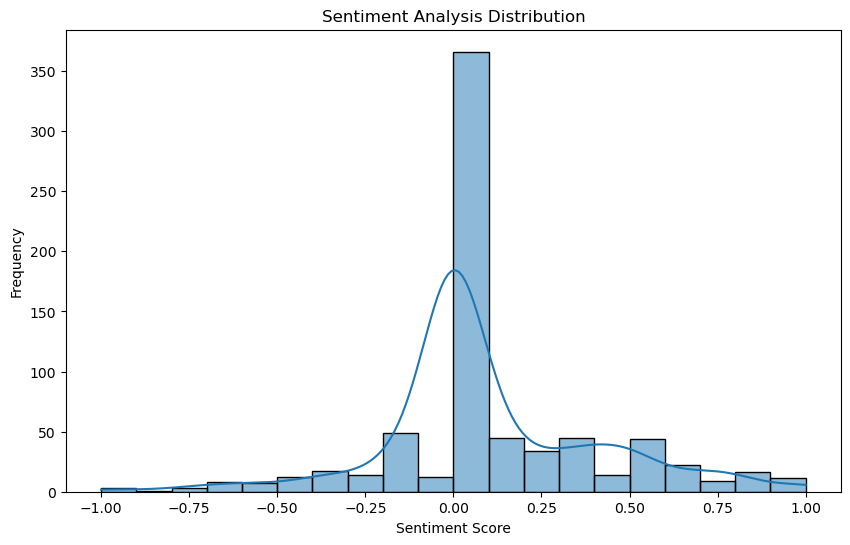

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=20, kde=True)
plt.title('Sentiment Analysis Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [10]:
data['sentiment'].describe()

count    732.000000
mean       0.098372
std        0.312592
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.250000
max        1.000000
Name: sentiment, dtype: float64

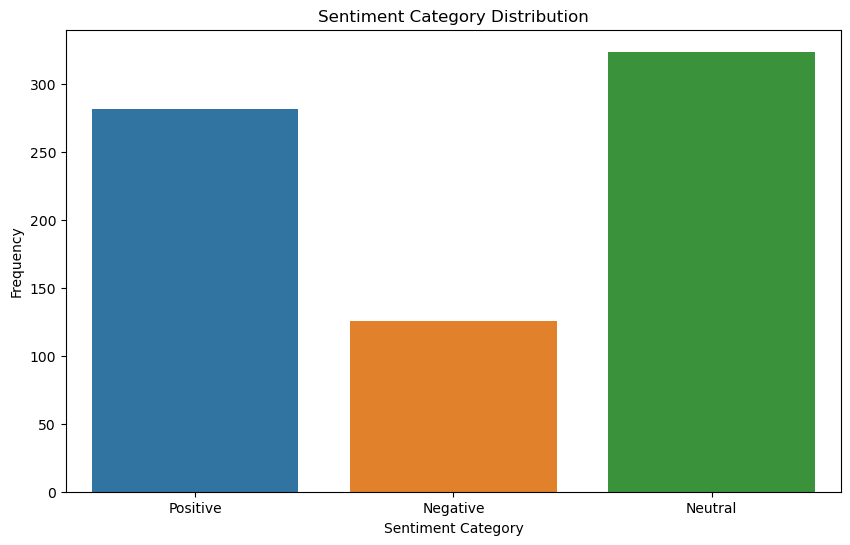

In [11]:
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=data)
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

In [12]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     -------------------------------------- 300.6/300.6 kB 2.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


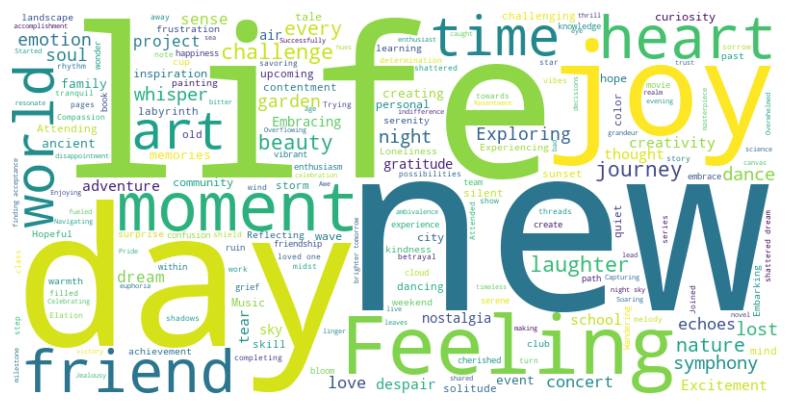

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = ' '.join(data['text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

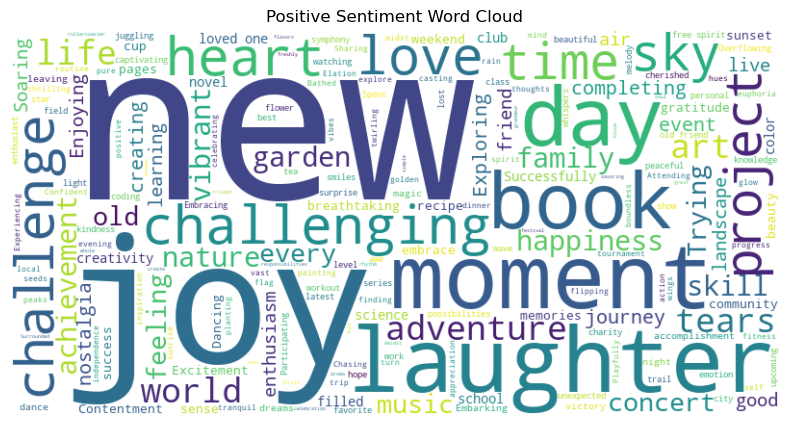

In [16]:
# Separate the text based on sentiment
positive_text = ' '.join(data[data['sentiment'] > 0]['text'].tolist())

# Generate the positive sentiment word cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the positive sentiment word cloud
plt.figure(figsize=(10, 5))
plt.title('Positive Sentiment Word Cloud')
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

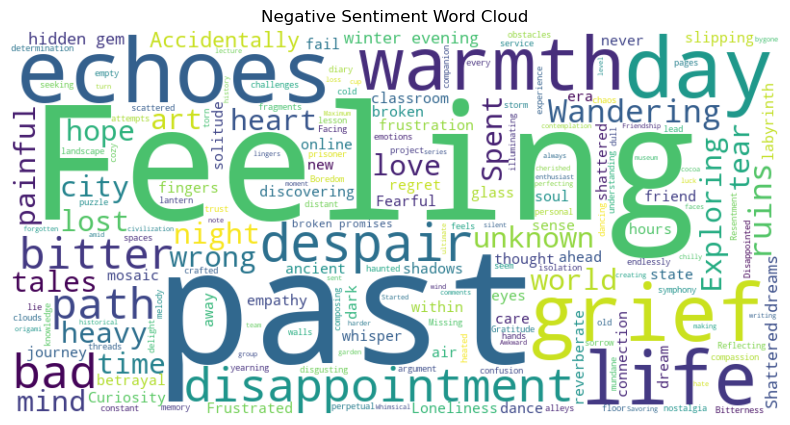

In [15]:
# Separate the text based on sentiment
negative_text = ' '.join(data[data['sentiment'] < 0]['text'].tolist())

# Generate the negative sentiment word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the negative sentiment word cloud
plt.figure(figsize=(10, 5))
plt.title('Negative Sentiment Word Cloud')
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()